In [69]:
import matplotlib.pyplot as plt

import pandas as pd
nation = pd.read_csv('/home/alp/Google Drive/Python/DataAnalysisClass/national-election-context-2018.csv')
nation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3114 non-null   object 
 1   county                  3114 non-null   object 
 2   fips                    3114 non-null   int64  
 3   trump16                 3114 non-null   int64  
 4   clinton16               3114 non-null   int64  
 5   otherpres16             3114 non-null   int64  
 6   total16                 3114 non-null   int64  
 7   romney12                3114 non-null   int64  
 8   obama12                 3114 non-null   int64  
 9   otherpres12             3114 non-null   int64  
 10  total12                 3114 non-null   int64  
 11  demsen16                1942 non-null   float64
 12  repsen16                1942 non-null   float64
 13  othersen16              1942 non-null   float64
 14  demhouse16              2862 non-null   

In [70]:
nation.sample(10)

,state,county,fips,trump16,clinton16,otherpres16,total16,romney12,obama12,otherpres12,...,age29andunder_pct,age65andolder_pct,median_hh_inc,clf_unemploy_pct,lesshs_pct,lesscollege_pct,lesshs_whites_pct,lesscollege_whites_pct,rural_pct,ruralurban_cc
445,Georgia,Lee,13177,10646,3170,327,14143,10314,3196,118,...,40.96,10.64,"62,797.00",6.93,11.48,75.84,8.66,75.89,36.23,3.00
633,Illinois,Morgan,17137,9076,4696,1028,14800,7972,5806,318,...,37.20,18.53,"47,760.00",7.24,9.18,79.36,8.29,78.64,36.23,4.00
2876,Virginia,Stafford,51179,33868,27908,4158,65934,32480,27182,921,...,43.49,9.13,"97,528.00",4.90,6.46,62.67,5.32,61.09,19.75,1.00
2994,West Virginia,Monongalia,54061,18432,14699,2917,36048,16831,13826,818,...,49.05,10.92,"47,060.00",6.07,8.41,60.83,8.34,61.98,26.86,3.00
2110,Oklahoma,Canadian,40017,39986,11674,3618,55278,35625,10537,0,...,41.15,12.04,"66,664.00",4.25,8.24,74.22,6.40,73.22,22.51,1.00
1960,North Carolina,Yancey,37199,6385,3196,379,9960,5278,3981,192,...,30.88,23.33,"36,993.00",9.46,16.58,79.86,15.61,79.28,100.00,8.00
2073,Ohio,Muskingum,39119,24056,11123,1812,36991,19264,17001,820,...,38.48,16.62,"42,464.00",7.58,13.50,84.93,12.83,84.62,47.03,4.00
1100,Louisiana,East Carroll,22035,1059,1838,42,2939,1508,2478,22,...,46.73,12.87,"22,093.00",11.52,29.56,88.73,22.41,82.80,34.58,7.00
2389,South Dakota,Spink,46115,1854,919,178,2951,1670,1300,71,...,36.05,20.08,"49,859.00",1.47,7.73,78.91,6.98,78.63,100.00,9.00
1986,North Dakota,McIntosh,38051,1100,235,111,1446,1035,459,36,...,27.55,32.08,"43,650.00",1.07,18.42,81.72,17.58,82.52,100.00,9.00


The data tells us how many votes were cast for various candidates (in 2016: Trump, Clinton, Other, 2012: Romney, Obama, Other). But the counties vary hugly in size:

In [71]:
nation['total16'].describe()

count       3,114.00
mean       43,736.95
std       125,728.78
min             0.00
25%         4,910.50
50%        11,092.50
75%        29,865.50
max     3,434,308.00
Name: total16, dtype: float64

The exponential notation is annoying. Let's try to fix that and redisplay the data.

In [72]:
pd.set_option('display.float_format', lambda x: f"{x:,.2f}") # you can specify the output with an f-string
nation['total16'].describe()

count       3,114.00
mean       43,736.95
std       125,728.78
min             0.00
25%         4,910.50
50%        11,092.50
75%        29,865.50
max     3,434,308.00
Name: total16, dtype: float64

Notice:
* So the `mean` number of votes per county is 43K, but with a SD of 125K!
* 50% of the counties have less than 11K votes cast, but the largest has 3.4M.

These are enormous variations, so again, we need to `normalize` the data.

The easiest way to do this is to calculate the percentage of votes cast in each county for the varous candidates. We can calculate and add these values to the DF very easily.

We will test this with Clinton and then add columns for other candidates. . . 

In [73]:
nation['pctHC'] = nation['clinton16'] / nation['total16'] * 100

In [74]:
nation.sample(5)[['pctHC','total16','clinton16']]

,pctHC,total16,clinton16
1944,23.71,29917,7094
2250,37.78,241112,91093
1034,26.38,3962,1045
2244,28.43,15764,4482
2233,31.65,28228,8934


In [75]:
639/3930

0.16259541984732825

OK, let's add the other columns. . . 

In [76]:
nation['pctDT'] = nation['trump16'] / nation['total16'] * 100
nation['pctBO'] = nation['obama12'] / nation['total12'] * 100
nation['pctMR'] = nation['romney12'] / nation['total12'] * 100
nation['pctOTH16'] = nation['otherpres16'] / nation['total16'] * 100
nation['pctOTH12'] = nation['otherpres12'] / nation['total12'] * 100

The DF has rows for all 3114 counties in the US (+DC). We will start by focusing only on Illinois, so we will make a new, smaller DF.

In [77]:
IL_df = nation[nation['state']=='Illinois']

Witte first discusss how correlation can be seen graphically, using scatterplots.

Let's examine this with our election data. We might expect Republican (R) voters to vote consistently for R candidates and similar behavior from Democratic (D) voters.

Let's make a scatterplot to see if this is the case

<AxesSubplot: xlabel='pctMR', ylabel='pctDT'>

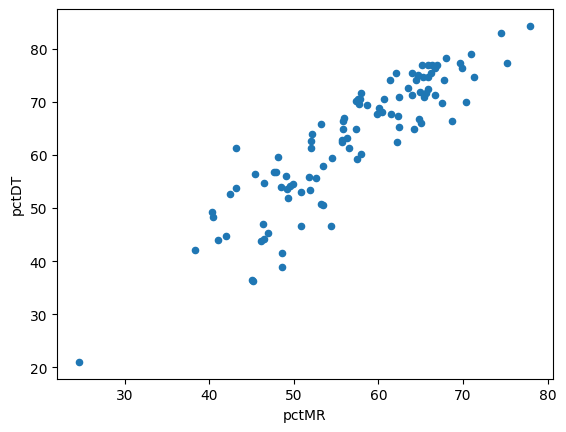

In [78]:
IL_df.plot.scatter(x='pctMR',y='pctDT') # this is plotting the percent supporting Romney against support for Trump

<AxesSubplot: xlabel='pctBO', ylabel='pctHC'>

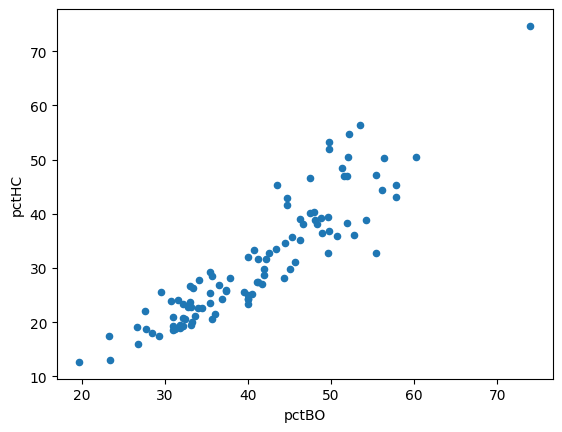

In [79]:
IL_df.plot.scatter(x='pctBO',y='pctHC')

These plots look like mirror images (look at the outlier at the top left for the D chart and it's mirror at the bottom right for the R chart). This is because D and R divide up the votes in most IL counties almost completely.

In both cases, there is a positive relationship between these two D or two R variables.

We can flip this question over to consider the correlation between voting for Obama (D) and Trump (R)

<AxesSubplot: xlabel='pctBO', ylabel='pctDT'>

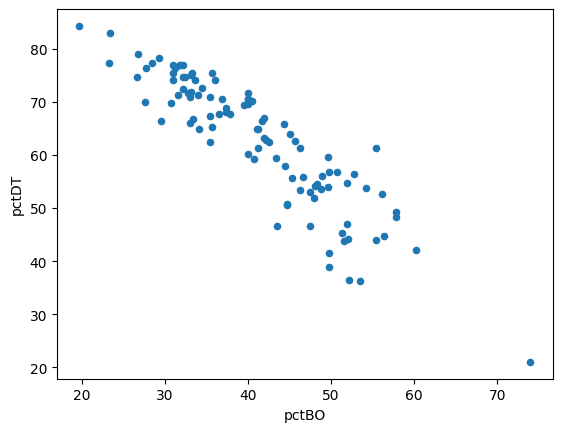

In [80]:
IL_df.plot.scatter(x='pctBO',y='pctDT')

Here we see a negative correlation: the more people voted for Obama, the less they voted for Trump.

Do voters who cast ballots for third party candidates do so consistently?

<AxesSubplot: xlabel='pctOTH16', ylabel='pctOTH12'>

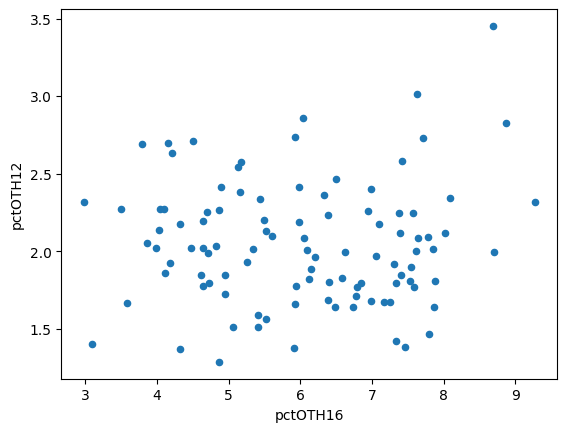

In [81]:
IL_df.plot.scatter(x='pctOTH16',y='pctOTH12')

Apparently not! This shows there is little relationship between these two variables.

You may have heard various things about who supports which candidates ("Women tended to support Clinton more than Trump", "White voters tended to support Trump", etc.)

One way to see if there are correlations between different variables in our table is to graph them. We could do this variable by variable, but if we plot a bunch of variables against against our control variable (support for a candidate), it will be easier to compare them and take up less space.

Here's what we need to do:
1. We need to look at the list of variables and pick nine to visualize.
1. Put the variables to study into a list
1. Create a create a figure with subplots in a 3x3 grid. 
1. For each subplot, we will create a subplot with the two variables we wish to compare. 
1. We will assign each subplot to a location [ (0,0),(0,1),(0,2),(1,0),etc ] in the 3x3 grid. This is easy to do with the `//` and `%` operators. 
    * `//` divides X by Y and rounds down the answer (so $7//3 = 2$)
    * `%` divides X by Y and reports the remainder (so $7\%3 = 1$) (this is called the `modulo` operator)

In [82]:
IL_df.columns

Index(['state', 'county', 'fips', 'trump16', 'clinton16', 'otherpres16',
       'total16', 'romney12', 'obama12', 'otherpres12', 'total12', 'demsen16',
       'repsen16', 'othersen16', 'demhouse16', 'rephouse16', 'otherhouse16',
       'demgov16', 'repgov16', 'othergov16', 'repgov14', 'demgov14',
       'othergov14', 'total_population', 'cvap', 'white_pct', 'black_pct',
       'hispanic_pct', 'nonwhite_pct', 'foreignborn_pct', 'female_pct',
       'age29andunder_pct', 'age65andolder_pct', 'median_hh_inc',
       'clf_unemploy_pct', 'lesshs_pct', 'lesscollege_pct',
       'lesshs_whites_pct', 'lesscollege_whites_pct', 'rural_pct',
       'ruralurban_cc', 'pctHC', 'pctDT', 'pctBO', 'pctMR', 'pctOTH16',
       'pctOTH12'],
      dtype='object')

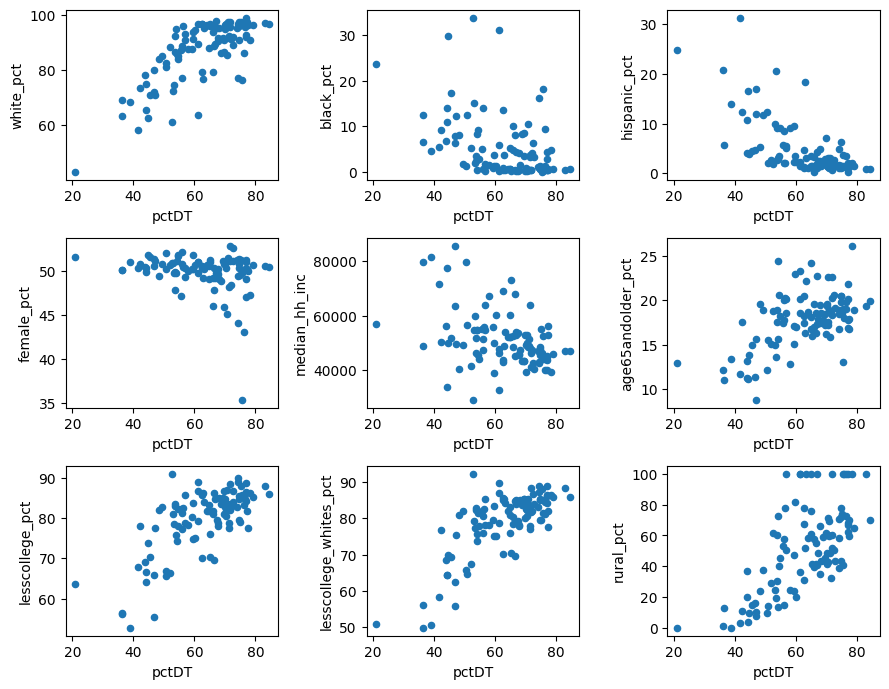

In [83]:
cols = ['white_pct','black_pct','hispanic_pct',\
        'female_pct','median_hh_inc','age65andolder_pct',\
        'lesscollege_pct','lesscollege_whites_pct','rural_pct']
fig,ax = plt.subplots(3,3,figsize = (9,7)) # this creates a figure with a 3x3 grid of subplots
for i in range(9): # this will give us numbers from 0 to 9
    IL_df.plot.scatter(x='pctDT',y=cols[i],ax = ax[i//3,i%3] ) # the ax[x,y] specifies which subplot to use

fig.tight_layout()
plt.show()
# adapted from https://stackoverflow.com/questions/56408988/plotting-scatterplots-from-a-dataframe-on-a-grid-with-matplotlib
#
# generally, I would loop through the items in the list of variables, but in this case, since I need a number in order to 
# specify the x,y numbers for the subplots, I decided to use a loop with numbers; the y-variable is determined by list index 

#### Note that the y-axis values vary from plot to plot.
Since our goal is to get an overview of these variables, this isn't a problem but we wouldn't want to blithly compare them to each other based on these views.

Looking at this set of scatterplots, which variables seem correlated with voting for Trump? Which do not?

Scatterplots are especially useful in helping us identify outliers. In these plots, are there any outliers? How can you tell?

Can you think of reasons why some variables might not show a clear tendancy?

Let's do the same visualizations for Romney.

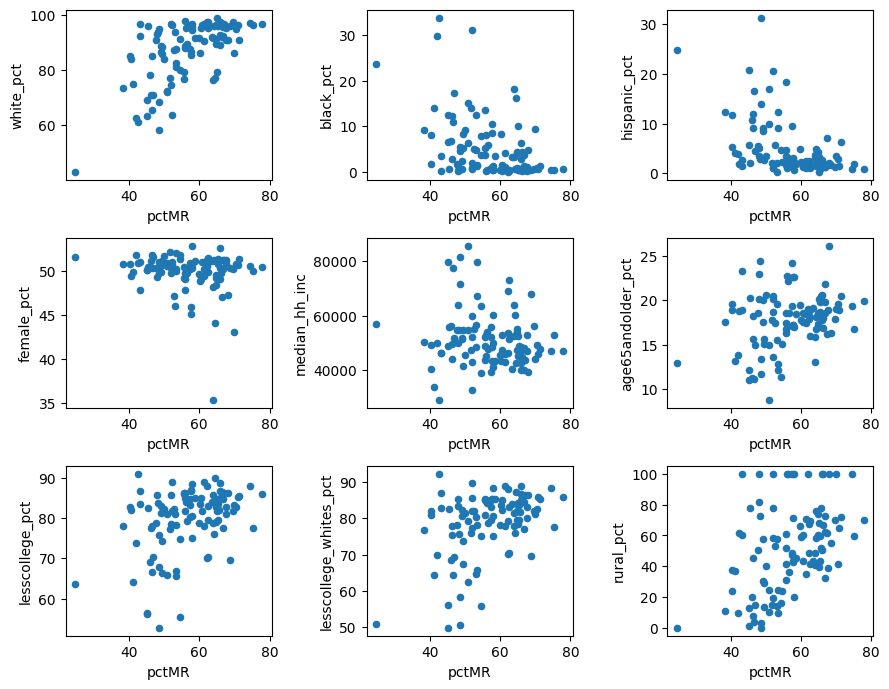

In [84]:
cols = ['white_pct','black_pct','hispanic_pct',\
        'female_pct','median_hh_inc','age65andolder_pct',\
        'lesscollege_pct','lesscollege_whites_pct','rural_pct']
fig,ax = plt.subplots(3,3,figsize = (9,7))
for i in range(9): # this will give us numbers from 0 to 9
    IL_df.plot.scatter(x='pctMR',y=cols[i],ax = ax[i//3,i%3] )
    #ax[i//3,i%3].axis('off')

fig.tight_layout()
plt.show()


Comparing the two sets of graphs, how did voting patterns shift from 2012 to 2016? 

Play around with this a bit: try different variables and/or seeing how they correlate with support for Clinton or Obama.

After showing us how scatter plots can visually illustrate variables that are correlated (and spot outliers), Witte discuss how statisticians calculate `r`, the `correlation coefficient` or `Pearson coefficient`.  

We don't need to worry about the math (as usual, Pandas will do the number crunching for us), but pay attention to what different values of $r$ mean. 

# Your Turn

If two variables had the following $r$ values, what would it indicate? Edit this cell to add your answers 
* $r = -1$ indicates 
* $r = 0$ indicates
* $r = 1$ indicates


Let's look, again, at scatterplot for Romney/Trump.

What sort of $r$ value would you expect for this graph?

<AxesSubplot: xlabel='pctMR', ylabel='pctDT'>

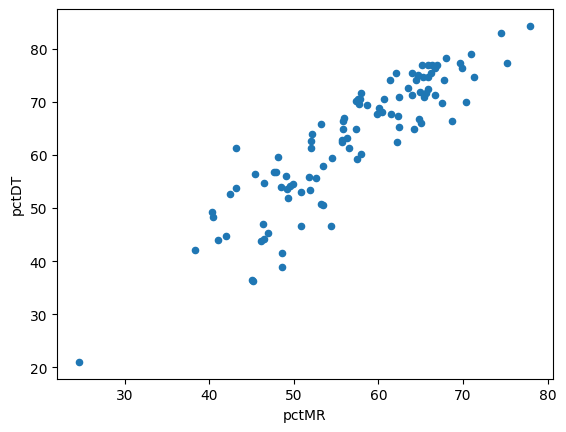

In [85]:
IL_df.plot.scatter(x='pctMR',y='pctDT')

Pandas has a `.corr()` function that will calculate the correlation between the variables in a DF.

The next cell creates a temporary DF that has only two columns: `pctMR` and `pctDT`. It then calcuates the Pierson correlation coefficient between them. 

In [86]:
IL_df[['pctMR','pctDT']].corr()

,pctMR,pctDT
pctMR,1.00,0.89
pctDT,0.89,1.00


As you would expect, `pctMR` is perfectly correlated ($r=1$) with itself.
For `pctDT` and `pctMR`, $r=0.89$.

Since it is positive, a line runing throught the scatterplot would be rising from left to right.

Why is this? 
* A positive correlation means that as one varible increases, the other variable should increase.
* A negative correlation means that as one variable increases, the other variable should decrease. 


Since it is close to 1, the correlation between these two sets of data is close.

Let's look at the correlation for the two D candidates.



In [87]:
IL_df[['pctBO','pctHC']].corr()

,pctBO,pctHC
pctBO,1.00,0.91
pctHC,0.91,1.00


The correlation here is also positive, but even stronger (albeit by only 0.02!)

Recall our 9x9 grid of scatterplots. Let's calculate their correlation coefficients with the percent of votes cast for DT. 

In [88]:
IL_df[['pctDT','white_pct','black_pct','hispanic_pct',\
        'female_pct','median_hh_inc','age65andolder_pct',\
        'lesscollege_pct','lesscollege_whites_pct','rural_pct']].corr()

,pctDT,white_pct,black_pct,hispanic_pct,female_pct,median_hh_inc,age65andolder_pct,lesscollege_pct,lesscollege_whites_pct,rural_pct
pctDT,1.00,0.75,-0.44,-0.67,-0.24,-0.41,0.56,0.71,0.75,0.67
white_pct,0.75,1.00,-0.80,-0.72,0.03,-0.22,0.63,0.48,0.58,0.63
black_pct,-0.44,-0.80,1.00,0.19,-0.16,-0.19,-0.35,-0.14,-0.21,-0.36
hispanic_pct,-0.67,-0.72,0.19,1.00,0.06,0.53,-0.59,-0.48,-0.58,-0.57
female_pct,-0.24,0.03,-0.16,0.06,1.00,0.06,0.07,-0.23,-0.17,-0.13
median_hh_inc,-0.41,-0.22,-0.19,0.53,0.06,1.00,-0.53,-0.64,-0.65,-0.41
age65andolder_pct,0.56,0.63,-0.35,-0.59,0.07,-0.53,1.00,0.69,0.72,0.75
lesscollege_pct,0.71,0.48,-0.14,-0.48,-0.23,-0.64,0.69,1.00,0.98,0.67
lesscollege_whites_pct,0.75,0.58,-0.21,-0.58,-0.17,-0.65,0.72,0.98,1.00,0.70
rural_pct,0.67,0.63,-0.36,-0.57,-0.13,-0.41,0.75,0.67,0.70,1.00


The first column allows us to answer our question. Which of these demographic groups (variables) were positivley / negatively correlated with votes for DT?

If you find this a bit hard to read, Pandas can format it better, with colors to indicate the size and direction of the correlation. Let's run this again, but 
* with colors and 
* for Romney

In [91]:

corr1 = IL_df[['pctMR','white_pct','black_pct','hispanic_pct',\
        'female_pct','median_hh_inc','age65andolder_pct',\
        'lesscollege_pct','lesscollege_whites_pct','rural_pct']].corr()
corr1.style.background_gradient(cmap='coolwarm',axis=None).format(precision=3)

,pctMR,white_pct,black_pct,hispanic_pct,female_pct,median_hh_inc,age65andolder_pct,lesscollege_pct,lesscollege_whites_pct,rural_pct
pctMR,1.000,0.626,-0.441,-0.507,-0.164,-0.146,0.296,0.406,0.450,0.452
white_pct,0.626,1.000,-0.797,-0.721,0.028,-0.220,0.634,0.483,0.584,0.630
black_pct,-0.441,-0.797,1.000,0.189,-0.156,-0.186,-0.352,-0.139,-0.208,-0.356
hispanic_pct,-0.507,-0.721,0.189,1.000,0.055,0.527,-0.587,-0.476,-0.585,-0.566
female_pct,-0.164,0.028,-0.156,0.055,1.000,0.060,0.072,-0.235,-0.174,-0.126
median_hh_inc,-0.146,-0.220,-0.186,0.527,0.060,1.000,-0.528,-0.638,-0.654,-0.405
age65andolder_pct,0.296,0.634,-0.352,-0.587,0.072,-0.528,1.000,0.686,0.717,0.752
lesscollege_pct,0.406,0.483,-0.139,-0.476,-0.235,-0.638,0.686,1.000,0.980,0.667
lesscollege_whites_pct,0.450,0.584,-0.208,-0.585,-0.174,-0.654,0.717,0.980,1.000,0.702
rural_pct,0.452,0.630,-0.356,-0.566,-0.126,-0.405,0.752,0.667,0.702,1.000


Notice that, while the direction of the correlation (pos/neg) for the variables between DT and MR, the values for DT were generally higher.
Why is this? As Witte notes, one shouldn't read too much in to the $r$ values.
* Perhaps MR was a weaker candidate
* The US has become increasingly polarized between D and R, so perhaps the amplified $r$ values reflect this. Maybe this would have happened regardless of the candidate.
* Perhaps DT was less (or more) attractive to different groups than Romeny. The values for `female_pct` are interesting in this regard: both MR and DT negative $r$ values but DT's was stronger (-0.24 vs -0.15). You may recall that just before the election, a recording of DT being interviewed was released in which he casually spoke of sexually assaulting women ("grabbing them by the pussy"). It is reasonable to assume that this sort of comment didn't help him attract female voters.

While we were interested in support for the presidential candidates, the correlation table also shows how all the other variables relate to each other. (And these values don't change when we change the political candidate!)

For example, median household income (`median_hh_inc`) is negatively correlated with not having a college degree ($r = -0.638$).

In Illinois, the more rural a county is (I have NO idea how this is defined / determined!), 
* the more older people it has (`age65andolder_pct` has $r=0.752$), 
* the whiter it is (`white_pct`, $r=0.630$), and 
* the more people it has with less than a college education (`lesscollege_pct`, $r=0.667$).

Who cares? Given the above chart about support for Trump in 2016, what sort of advice might you give to a R running in 2024? 
* What groups of voters could you count on? 
* Which groups do you need to focus on to ensure their support? 
* Are there some groups who didn't support a R previously but might be 'gettable'? 

These sorts of questions are at the heart of modern political campaigns. And this sort of analysis allows these questions to be answered.

Witte, rightly, tells us to normalize the data before comparing it. But recall that normalized data conceals the size of the count. When trying to win a campaign, what matters is votes, not the number of counties carried. IL is not the only state that winning a handful of counties can carry the state. In 2016, there were 2.15M votes cast in Cook county (=Chicago). This is more than in the 90 smallest population counties in IL. How much time and effort would you tell your candidate to spend in Alexander county (total votes in 2016 = 2,846)?

# Your turn

In the above examples, we focused on just Illinois. How similar is IL to the nation or to another state?

Answer this question by repeating the above analysis on *either* the whole national dataset *or* pick one state. If you want to pick one state, select one from the list in the next cell that has more than 64 counties. (A scatterplot of RI or HI would have only 5 or 4 points, which makes it hard to see any pattern!)

Once you have figured out your dataset:
1. Run the code to produce the grid of scatterplots. (Explore using different variables if you wish.)
1. Run the code to produce the correlation table.

Compare the data from your selected dataset to that of Illionis. Is IL similar to your target? If not, where is it different? What does this suggest to you? Write a few sentences explaining your analysis.

In [90]:
nation['state'].value_counts()

Texas                   254
Georgia                 159
Virginia                134
Kentucky                120
Missouri                116
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Florida                  67
Pennsylvania             67
Alabama                  67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Utah                